## <code style="color:steelblue">Student Name: Zheyuan Dong</code>

<br> The purpose of this project is to train an algorithm that predicts potential hydrocodone opioid users 
<br> **Data:** National Study of Drug Use and Health (NSDUH)
<br> **Task:** classification
<br> **Winning condition:** recall rate > 70%  (ultimately this algorithm will be used on another dataset to for sample restriction purpose, so I want more punishment on under-predicting rather than over-predicting)

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns 
sns.set_style('darkgrid')

In [2]:
raw = r'C:\Users\Damie\Dropbox\Hydrocodone upscheduling project\raw data'
cleaned = r'C:\Users\Damie\Dropbox\Hydrocodone upscheduling project\Clean Datasets'

# I. Exploring raw survey data

In [3]:
nsduh= pd.read_stata(raw + '/NSDUH_2002_2019.dta')

In [4]:
df0 = nsduh.copy()
df0.head()

,year,irsex,catage,irmarit,iimarit,medicare,prvhltin,caidchip,imother,ifather,wrkslfem,irpsoc,iipsoc,irpssi,iipssi,irppmt,iippmt,irpwag,iipwag,hydrocd2,ireduc2,irpinc3,irfamin3,iipinc3,iifamin3,hydcodop,anyhlti2,poverty2,hydcpdapyu,wrkidst2
0,2002,1 - Male,3 - 26-34 Years Old,1 - Married,1 - Marital status from questionnaire,2 - No,1 - Yes,2 - No,4 - R is 18 or older,4 - R is 18 or older,2 - No,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,1 - Yes,1 - Questionnaire data,0 - No/Unknown,8 - Twelfth grade,"6 - $50,000 - $74,999","6 - $50,000 - $74,999",1 - Questionnaire data,1 - Questionnaire data,0 - No/Unknown,1 - Yes,3 - Income > 2X Fed Pov Thresh,-9 - Data not collected for this year,-9 - Data not collected for this year
1,2002,2 - Female,2 - 18-25 Years Old,4 - Never Been Married,1 - Marital status from questionnaire,2 - No,1 - Yes,2 - No,4 - R is 18 or older,4 - R is 18 or older,2 - No,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,1 - Yes,1 - Questionnaire data,0 - No/Unknown,11 - Senior/16th year or Grad/Prof School,"4 - $30,000 - $39,999","7 - $75,000 or more",1 - Questionnaire data,1 - Questionnaire data,0 - No/Unknown,1 - Yes,3 - Income > 2X Fed Pov Thresh,-9 - Data not collected for this year,-9 - Data not collected for this year
2,2002,1 - Male,2 - 18-25 Years Old,4 - Never Been Married,1 - Marital status from questionnaire,94 - DON T KNOW,94 - DON T KNOW,94 - DON T KNOW,4 - R is 18 or older,4 - R is 18 or older,1 - Yes,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,1 - Yes,1 - Questionnaire data,0 - No/Unknown,9 - Freshman/13th year,"1 - Less than $10,000","1 - Less than $10,000",1 - Questionnaire data,1 - Questionnaire data,1 - Yes,94 - DON T KNOW,1 - Living in Poverty,-9 - Data not collected for this year,-9 - Data not collected for this year
3,2002,1 - Male,2 - 18-25 Years Old,4 - Never Been Married,1 - Marital status from questionnaire,2 - No,1 - Yes,2 - No,4 - R is 18 or older,4 - R is 18 or older,99 - LEGITIMATE SKIP,2 - No,1 - Questionnaire data,1 - Yes,1 - Questionnaire data,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,0 - No/Unknown,10 - Sophomore/14th year or Junior/15th year,"1 - Less than $10,000","1 - Less than $10,000",1 - Questionnaire data,1 - Questionnaire data,0 - No/Unknown,1 - Yes,1 - Living in Poverty,-9 - Data not collected for this year,-9 - Data not collected for this year
4,2002,2 - Female,4 - 35 or Older,1 - Married,1 - Marital status from questionnaire,1 - Yes,1 - Yes,2 - No,4 - R is 18 or older,4 - R is 18 or older,99 - LEGITIMATE SKIP,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,2 - No,1 - Questionnaire data,1 - Yes,1 - Questionnaire data,0 - No/Unknown,8 - Twelfth grade,"1 - Less than $10,000","5 - $40,000 - $49,999",1 - Questionnaire data,1 - Questionnaire data,0 - No/Unknown,1 - Yes,3 - Income > 2X Fed Pov Thresh,-9 - Data not collected for this year,-9 - Data not collected for this year


In [5]:
# Renaming variables
dictionary = {
    'irsex': 'sex',
    'catage': 'age_group',
    'irmarit': 'marital',
    'iimarit': 'marital_impute',
    'anyhlti2': 'insurance_any',
    'medicare': 'insurance_medicare',
    'prvhltin': 'insurance_private',
    'caidchip': 'insurance_poor',
    'imother': 'present_mother',
    'ifather': 'present_father',
    'wrkslfem': 'self_employed',
    'irpsoc': 'ssrr_receipient',
    'iipsoc': 'ssrr_receipient_impute',
    'irpssi': 'ssi_receipient', 
    'iipssi': 'ssi_receipient_impute',
    'irppmt': 'publicAssist_receipient',
    'iippmt': 'publicAssist_receipient_impute',
    'irpwag': 'wage_receipient',
    'iipwag': 'wage_receipient_impute', 
    'ireduc2': 'education',
    'irpinc3': 'income',
    'iipinc3': 'income_impute',
    'irfamin3': 'income_family',
    'iifamin3': 'income_family_impute',
    'poverty2': 'poverty_status',
    'wrkidst2': 'industry',
    'hydrocd2': 'hydro_ever',
    'hydcodop': 'hydro_ever_general',
    'hydcpdapyu': 'hydro_pastYear'
}

df0.rename(columns= dictionary, inplace = True)

In [6]:
# Replace chunky values with number indicators
dict2 = {'-9 - Data not collected for this year': '-9',
         '0 - No/Unknown' : '0',
         '1 - Yes': '1'}

df0.replace(dict2, inplace= True)

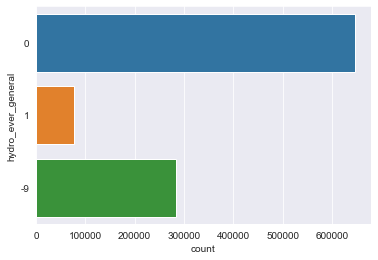

In [7]:
# Distribution of outcome variable 
sns.countplot(y= df0.hydro_ever_general)
plt.show()

In [8]:
# Number of years available for target variable 
df0[df0.hydro_ever_general!= '-9'].year.unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'], dtype=object)

In [9]:
# Restrict years to only ones where target is observable
df0.year = df0.year.astype(int)

df0 = df0[df0.year <= 2014]

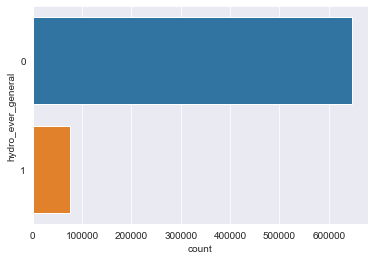

In [10]:
sns.countplot(y= df0.hydro_ever_general)
plt.show()

## Keep only observations that do not have imputed value

In [11]:
df0 = df0[df0.marital_impute != '3 - Marital status statistically imputed']
df0.drop('marital_impute', axis=1, inplace=True)

In [12]:
varlist = ['ssrr_receipient_impute', 'ssi_receipient_impute', 'publicAssist_receipient_impute',
           'income_family_impute', 'income_impute', 'wage_receipient_impute']

for var in varlist:
    df0= df0[df0[var] != '3 - Statistically imputed data']
    df0.drop(var, axis=1, inplace= True)

In [13]:
df0.columns

Index(['year', 'sex', 'age_group', 'marital', 'insurance_medicare',
       'insurance_private', 'insurance_poor', 'present_mother',
       'present_father', 'self_employed', 'ssrr_receipient', 'ssi_receipient',
       'publicAssist_receipient', 'wage_receipient', 'hydro_ever', 'education',
       'income', 'income_family', 'hydro_ever_general', 'insurance_any',
       'poverty_status', 'hydro_pastYear', 'industry'],
      dtype='object')

In [14]:
df0.shape

(644502, 23)

## Cleaning the values for the categorical values

In [15]:
df0.sex.replace(['1 - Male', '2 - Female'], ['male', 'female'], inplace= True) 
df0.sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
df0.age_group.replace({
    '3 - 26-34 Years Old': '26To34',
    '2 - 18-25 Years Old': '18To25',
    '4 - 35 or Older': '35Plus',
    '1 - 12-17 Years Old': '12To17'
}, inplace= True)
df0.age_group.unique()

array(['26To34', '18To25', '35Plus', '12To17'], dtype=object)

In [17]:
df0.marital.replace({
    '1 - Married': 'married',
    '4 - Never Been Married': 'never',
    '99 - LEGITIMATE SKIP Respondent is <= 14 years old': 'skip',
    '3 - Divorced or Separated': 'divored',
    '2 - Widowed': 'widowed'
}, inplace= True)
df0.marital.unique()

array(['married', 'never', 'skip', 'divored', 'widowed'], dtype=object)

In [18]:
df0.insurance_medicare.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '94 - DON T KNOW': 'missing',
    '98 - BLANK': 'missing',
    '97 - REFUSED': 'missing',
    '85 - BAD DATA Logically assigned': 'missing'
}, inplace= True)
df0.insurance_medicare.unique()

array(['No', 'missing', 'Yes'], dtype=object)

In [19]:
df0.insurance_private.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '94 - DON T KNOW': 'missing',
    '98 - BLANK': 'missing',
    '97 - REFUSED': 'missing',
    '85 - BAD DATA Logically assigned': 'missing'
}, inplace= True)
df0.insurance_private.unique()

array(['Yes', 'missing', 'No'], dtype=object)

In [20]:
df0.insurance_poor.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '94 - DON T KNOW': 'missing',
    '98 - BLANK': 'missing',
    '97 - REFUSED': 'missing',
    '85 - BAD DATA Logically assigned': 'missing'
}, inplace= True)
df0.insurance_poor.unique()

array(['No', 'missing', 'Yes'], dtype=object)

In [21]:
df0.insurance_any.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '94 - DON T KNOW': 'missing',
    '98 - OTHER MISSING': 'missing',
    '97 - REFUSED': 'missing'
}, inplace= True)
df0.insurance_any.unique()

array(['Yes', 'missing', 'No'], dtype=object)

In [22]:
df0.self_employed.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '5 - Yes LOGICALLY ASSIGNED': 'Yes',
    '3 - Yes LOGICALLY ASSIGNED': 'Yes',
    '99 - LEGITIMATE SKIP': 'skip',
    '94 - DON T KNOW': 'missing',
    '98 - BLANK': 'missing',
    '97 - REFUSED': 'missing'
}, inplace= True)
df0.self_employed.unique()

array(['No', 'Yes', 'skip', 'missing'], dtype=object)

In [23]:
df0.ssrr_receipient.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '99 - LEGITIMATE SKIP': 'skip',
    '-9' : 'missing'
}, inplace= True)
df0.ssrr_receipient.unique()

array(['No', 'Yes', 'skip', 'missing'], dtype=object)

In [24]:
df0.ssi_receipient.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '99 - LEGITIMATE SKIP': 'skip',
    '-9' : 'missing'
}, inplace= True)
df0.ssi_receipient.unique()

array(['No', 'Yes', 'skip', 'missing'], dtype=object)

In [25]:
df0.publicAssist_receipient.replace({
    '2 - No': 'No',
    '1': 'Yes',
    '99 - LEGITIMATE SKIP': 'skip',
    '-9' : 'missing'
}, inplace= True)
df0.publicAssist_receipient.unique()

array(['No', 'Yes', 'skip', 'missing'], dtype=object)

In [26]:
df0.education.replace({
    '8 - Twelfth grade': 'highschool_finished',
    '11 - Senior/16th year or Grad/Prof School': 'college_finished',
    '9 - Freshman/13th year': 'college',
    '10 - Sophomore/14th year or Junior/15th year': 'college',
    '5 - Ninth grade': 'highschool',
    '7 - Eleventh grade': 'highschool',
    '2 - Sixth grade': 'middle_school', 
    '4 - Eighth grade': 'middle_school',
    '3 - Seventh grade': 'middle_school',
    '6 - Tenth grade': 'middle_school',
    '1 - Fifth grade or less': 'elementary'
}, inplace= True)
df0.education.unique()

array(['highschool_finished', 'college_finished', 'college', 'highschool',
       'middle_school', 'elementary'], dtype=object)

In [27]:
df0.income.replace({
    '1 - Less than $10,000': 1,
    '2 - $10,000 - $19,999': 2,
    '3 - $20,000 - $29,999': 3,
    '4 - $30,000 - $39,999': 4,
    '5 - $40,000 - $49,999': 5,
    '6 - $50,000 - $74,999': 6,
    '7 - $75,000 or more': 7
}, inplace= True)
df0.income.value_counts()

1    358589
2     95587
3     61781
4     42538
6     32049
5     28559
7     25399
Name: income, dtype: int64

In [28]:
df0.income_family.replace({
    '1 - Less than $10,000': 1,
    '2 - $10,000 - $19,999': 2,
    '3 - $20,000 - $29,999': 3,
    '4 - $30,000 - $39,999': 4,
    '5 - $40,000 - $49,999': 5,
    '6 - $50,000 - $74,999': 6,
    '7 - $75,000 or more': 7
}, inplace= True)
df0.income_family.value_counts()

7    165999
6    109690
2     82083
3     77081
4     72970
5     71223
1     65456
Name: income_family, dtype: int64

In [29]:
df0.hydro_ever.replace(['0', '1'], [0, 1], inplace=True)
df0.hydro_ever.unique()

array([0, 1], dtype=int64)

In [30]:
df0.hydro_ever_general.replace(['0', '1'], [0, 1], inplace=True)
df0.hydro_ever_general.value_counts()

0    575471
1     69031
Name: hydro_ever_general, dtype: int64

In [31]:
df0.poverty_status = (df0.poverty_status == '1 - Living in Poverty').astype(int)
df0.poverty_status.value_counts()

0    529306
1    115196
Name: poverty_status, dtype: int64

In [32]:
df0.industry.replace({
    '-9': 'missing',
    '9998 - BLANK': 'missing',
    '9990 - NOT REPORTED/NOT CODABLE': 'missing',
    '9997 - REFUSED': 'missing',
    '9994 - DON T KNOW': 'missing',
    '9999 - LEGITIMATE SKIP': 'skip',
    '10 - Retail Trade': 'retail',
    '14 - Arts/Entertain/Recreation/Accommodation/Food Svcs': 'Arts/Entertain/Recreation/Accommodation/Food Svcs',
    '3 - Construction': 'construction',
    '13 - Education, Health & Social Services': 'education_health_social',
    '7 - Information & Communications': 'information_communication',
    '12 - Professional/Scientific/Mgmt/Admin/Waste Mgmt': 'management',
    '15 - Public Administration': 'public_administration',
    '5 - Manufacturing, Durable Goods': 'manufacturing_durable',
    '4 - Manufacturing, Nondurable Goods': 'manufacturing_nondurable',
    '11 - Finance, Insur, Real Estate, Rental & Leasing': 'finance_estate',
    '1 - Agriculture, Forestry, Fishing, & Hunting': 'agriculture_gathering',
    '9 - Wholesale Trade, Nondurable Goods': 'wholesale_nondurable',
    '8 - Wholesale Trade, Durable Goods': 'wholesale_durable',
    '6 - Transportation & Utilities': 'transportation_utility',
    '17 - Armed Forces': 'military',
    '2 - Mining': 'mining',
    '16 - Other Services': 'others'
}, inplace=True)

df0.industry.value_counts()

skip                                                 279223
education_health_social                               63238
Arts/Entertain/Recreation/Accommodation/Food Svcs     50094
missing                                               48599
retail                                                43428
management                                            30373
construction                                          24101
manufacturing_durable                                 17620
others                                                16587
finance_estate                                        16218
public_administration                                 12155
transportation_utility                                11302
manufacturing_nondurable                              10523
information_communication                              6370
agriculture_gathering                                  5643
wholesale_nondurable                                   3971
wholesale_durable                       

In [33]:
# Create a flag for occupations more easy to accumulate pain
hard_occupations= ['manufacturing_durable', 'manufacturing_nondurable', 'construction', 
                'agriculture_gathering', 'transportation_utility', 'agriculture_gathering',
                'mining', 'military']
df0['hard_occupation'] = (df0.industry.isin(hard_occupations)).astype(int)
df0.hard_occupation.value_counts()


0    573477
1     71025
Name: hard_occupation, dtype: int64

In [34]:
df0.columns

Index(['year', 'sex', 'age_group', 'marital', 'insurance_medicare',
       'insurance_private', 'insurance_poor', 'present_mother',
       'present_father', 'self_employed', 'ssrr_receipient', 'ssi_receipient',
       'publicAssist_receipient', 'wage_receipient', 'hydro_ever', 'education',
       'income', 'income_family', 'hydro_ever_general', 'insurance_any',
       'poverty_status', 'hydro_pastYear', 'industry', 'hard_occupation'],
      dtype='object')

In [35]:
# Drop unnecessary variables

varlist= ['present_father', 'present_mother', 'wage_receipient', 'hydro_ever', 'hydro_pastYear', 'year']
df0.drop(columns=varlist, inplace=True)

In [36]:
df0.head()

,sex,age_group,marital,insurance_medicare,insurance_private,insurance_poor,self_employed,ssrr_receipient,ssi_receipient,publicAssist_receipient,education,income,income_family,hydro_ever_general,insurance_any,poverty_status,industry,hard_occupation
0,male,26To34,married,No,Yes,No,No,No,No,No,highschool_finished,6,6,0,Yes,0,missing,0
1,female,18To25,never,No,Yes,No,No,No,No,No,college_finished,4,7,0,Yes,0,missing,0
2,male,18To25,never,missing,missing,missing,Yes,No,No,No,college,1,1,1,missing,1,missing,0
3,male,18To25,never,No,Yes,No,skip,No,Yes,No,college,1,1,0,Yes,1,missing,0
4,female,35Plus,married,Yes,Yes,No,skip,No,No,No,highschool_finished,1,5,0,Yes,0,missing,0


# II. Exploratory Graphs

Segmentation analysis for categorical values

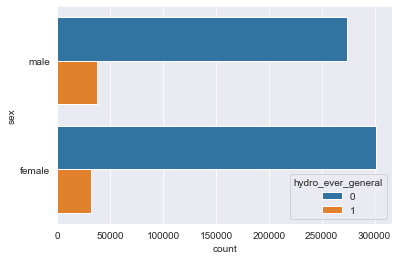

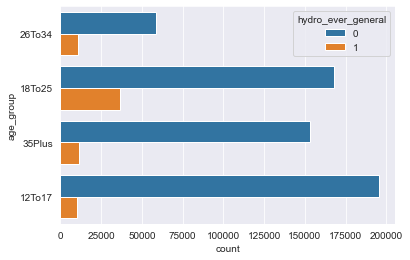

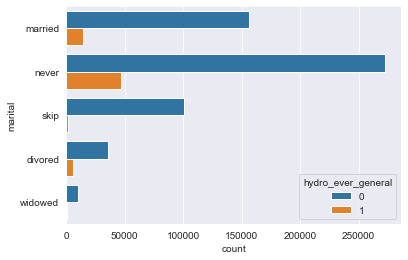

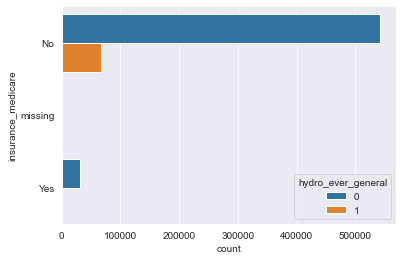

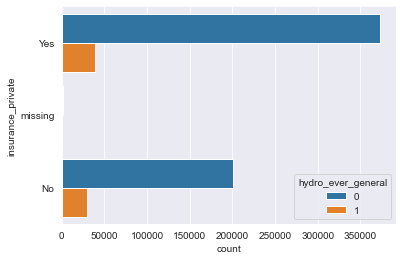

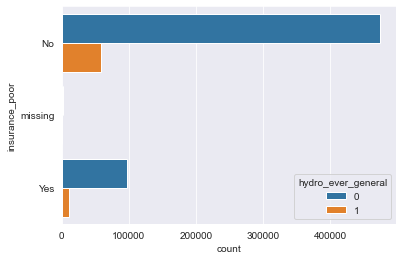

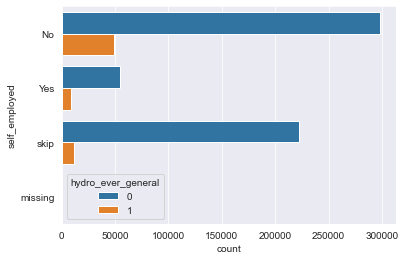

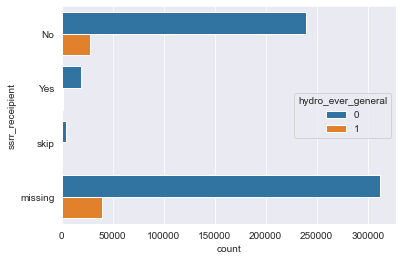

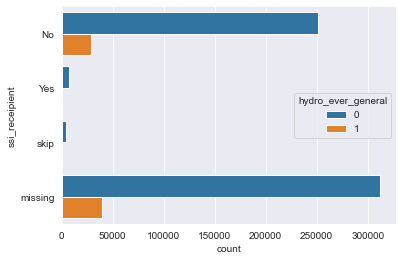

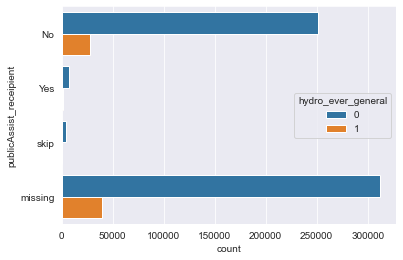

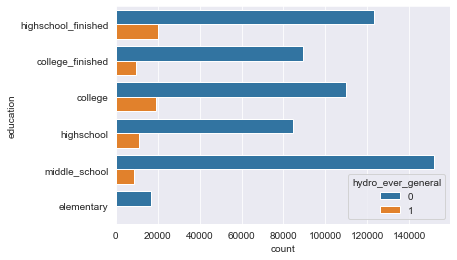

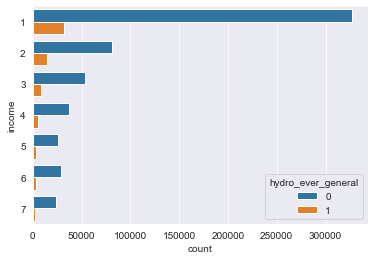

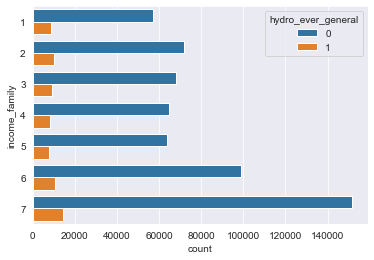

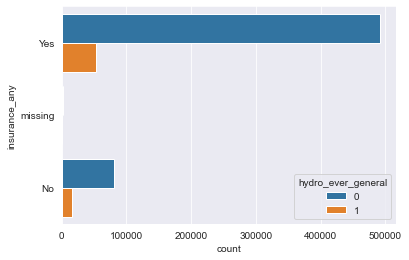

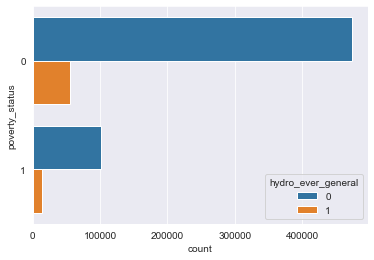

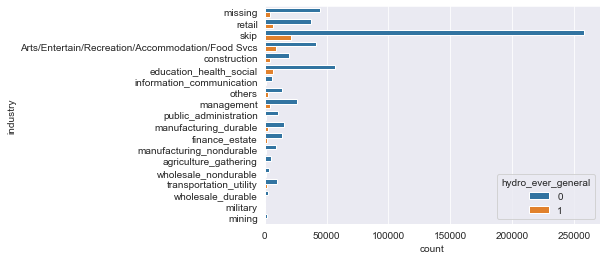

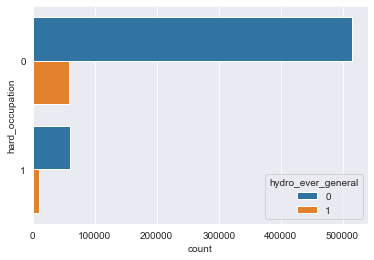

In [37]:
X = df0.drop('hydro_ever_general', axis=1)
for var in X.columns:
    sns.countplot(y= var, data= df0, hue= 'hydro_ever_general')
    plt.show()

Segmentation for family income

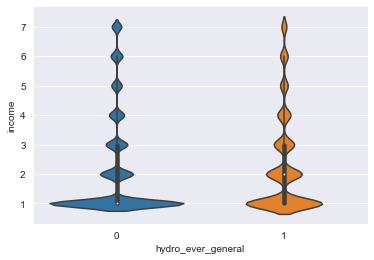

In [38]:
sns.violinplot(x= 'hydro_ever_general', y='income', data= df0 )
plt.show()

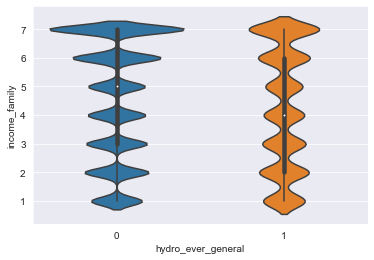

In [39]:
sns.violinplot(x= 'hydro_ever_general', y='income_family', data= df0 )
plt.show()

# Further cleaning for values, and save as ABT

In [40]:
varlist = ['age_group', 'education', 'industry', 'marital']
df0= pd.get_dummies(df0, columns=varlist)

In [41]:
df0.sex.replace(['male', 'female'], [1, 0], inplace= True)

In [42]:
varlist = ['insurance_medicare', 'insurance_private', 'insurance_poor',
    'self_employed', 'ssrr_receipient', 'ssi_receipient', 'publicAssist_receipient',
    'insurance_any']

for var in varlist:
    df0['{}_missing'.format(var)]= (df0[var]=='missing').astype(int)
    df0[var].replace(['Yes', 'No', 'missing', 'skip'], [1, 0, -1, -1], inplace= True)

In [ ]:
df0 = df0[df0.columns.drop(list(df0.filter(regex='skip')))]

In [56]:
varlist =  ['industry_Arts/Entertain/Recreation/Accommodation/Food Svcs',
       'industry_agriculture_gathering', 'industry_construction',
       'industry_education_health_social', 'industry_finance_estate',
       'industry_information_communication', 'industry_management',
       'industry_manufacturing_durable', 'industry_manufacturing_nondurable',
       'industry_military', 'industry_mining', 'industry_others', 
       'industry_public_administration', 'industry_retail',
       'industry_transportation_utility', 'industry_wholesale_durable',
       'industry_wholesale_nondurable', 'ssrr_receipient', 'ssi_receipient',
       'ssrr_receipient_missing', 'ssi_receipient_missing']

df0.drop(columns= varlist, inplace= True)

In [57]:
df0.head()

,sex,insurance_medicare,insurance_private,insurance_poor,self_employed,publicAssist_receipient,income,income_family,hydro_ever_general,insurance_any,poverty_status,hard_occupation,age_group_12To17,age_group_18To25,age_group_26To34,age_group_35Plus,education_college,education_college_finished,education_elementary,education_highschool,education_highschool_finished,education_middle_school,industry_missing,marital_divored,marital_married,marital_never,marital_widowed,insurance_medicare_missing,insurance_private_missing,insurance_poor_missing,self_employed_missing,ssrr_receipient_missing,ssi_receipient_missing,publicAssist_receipient_missing,insurance_any_missing
0,1,0,1,0,0,0,6,6,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,4,7,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-1,-1,-1,1,0,1,1,1,-1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1
3,1,0,1,0,-1,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,1,0,-1,0,1,5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
df0.to_csv(cleaned+ '\hydroUsers_ABT.csv', index=None)